## Stationarity and Detection

**For checking for stationarity and detection tools we are going to use financial stock data**

In [7]:
# Get financial data for yfinance 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron
import yfinance as yf
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="yfinance")


df = yf.download('AAPL', start='2023-01-01', end='2024-07-01') # Get data for Apple stock
print(df.head()) # Print the first 5 rows of the data

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  124.048042   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.327515   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.998451   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.560867   
2023-01-09  130.470001  133.410004  129.889999  130.149994  129.086533   

               Volume  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  


**Select the close price of the stock**

In [2]:
# Selecting the 'Close' column
close = df['Close']
print(close.head())

Date
2023-01-03    125.070000
2023-01-04    126.360001
2023-01-05    125.019997
2023-01-06    129.619995
2023-01-09    130.149994
Name: Close, dtype: float64


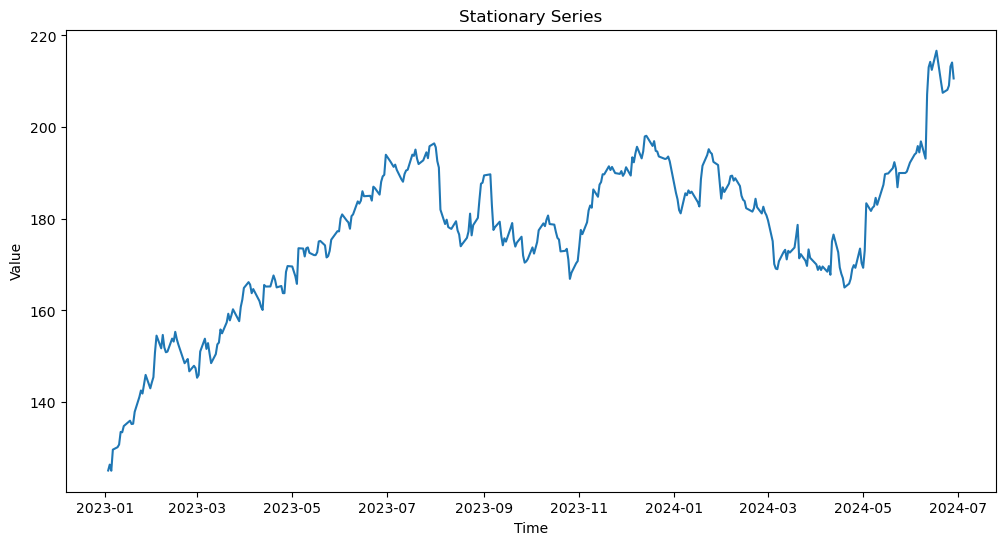

In [3]:
# Function to plot time series
def plot_series(series, title):
    plt.figure(figsize=(12, 6))
    plt.plot(series)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()

plot_series(close, 'Stationary Series')

### **Augmented Dickey-Fuller (ADF) Test:**

- Think of this as a "trend detector"
- It checks if your data has a consistent trend that needs to be accounted for

In [4]:
# Function to perform ADF test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')


print("Augmented Dickey-Fuller Test:")
adf_test(close)

Augmented Dickey-Fuller Test:
ADF Statistic: -2.344073434002748
p-value: 0.15814699361152068
Critical Values:
	1%: -3.4480516066132636
	5%: -2.869340997473759
	10%: -2.5709257824604


**ADF test and explaination**

1. ADF Statistic: 
This is the test statistic calculated from your stock price data. By itself, this number doesn't tell us much - we need to compare it to the Critical Values.

1. p-value:
This is the key number to look at. In statistical terms, it represents the probability that we'd observe data like this if the null hypothesis (that the data is non-stationary) were true.

   - If p-value < 0.05: We reject the null hypothesis. In business terms, this means we have strong evidence that the stock prices are stationary.
   - If p-value > 0.05: We fail to reject the null hypothesis. This suggests the stock prices are likely non-stationary.

1. Critical Values:
These are benchmark values for the ADF statistic at different confidence levels (1%, 5%, and 10%). If the ADF Statistic is more negative than these values, it suggests stationarity.

**Interpretation for a Business Decisions:**

1. If p-value is less than 0.05:
   "Our analysis suggests that the stock prices are stationary. This means the price behavior is relatively stable over time, without strong persistent trends. It's easier to forecast such prices, and traditional forecasting models are more likely to be reliable."

2. If p-value is greater than 0.05:
   "The evidence suggests that the stock prices are non-stationary. This likely means there are persistent trends or changing patterns in the price over time. It's more challenging to forecast such prices, and we may need to use more advanced techniques or transform the data before analysis."

**Business Implications:**

1. Forecasting: If the series is stationary, many standard forecasting tools can be applied directly. If it's non-stationary, you might need to adjust your approach.

2. Risk Management: Non-stationary price series might indicate changing market conditions or evolving investor behavior, which could impact risk assessments.

3. Trading Strategies: Stationarity or lack thereof can inform trading strategies. For example, mean-reversion strategies often assume some level of stationarity.

4. Long-term Planning: Non-stationary series might reflect fundamental changes in the market or the company, which could be relevant for long-term business planning.

5. Further Investigation: If the series is non-stationary, it might be worth investigating why. Are there structural changes in the market? Has the company's fundamentals changed significantly?


### **Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test:**

- This is like a "stability checker"
- It looks for whether your data is stable around a constant value or a trend

In [5]:
warnings.filterwarnings('ignore')

# Function to perform KPSS test
def kpss_test(series):
    result = kpss(series)
    print('KPSS Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[3].items():
        print(f'\t{key}: {value}')

print("\nKPSS Test:")
kpss_test(close)


KPSS Test:
KPSS Statistic: 1.582363836884387
p-value: 0.01
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


**Interpretation of KPSS Test Results:**

1. KPSS Statistic: 1.582363836884387
   This is the calculated test statistic from your stock price data. By itself, this number isn't very meaningful - we need to compare it to the Critical Values and look at the p-value.

2. p-value: 0.01
   This is crucial. In the KPSS test, unlike the ADF test, a small p-value suggests non-stationarity.

3. Critical Values:
   These are benchmark values at different confidence levels. If the KPSS Statistic is larger than these values, it suggests non-stationarity.

4. Warning Message:
   The warning indicates that the test statistic is so large that it's beyond the range of the standard p-value table. This strengthens the evidence of non-stationarity.

**Business Interpretation:**

"Our analysis strongly suggests that the stock prices are non-stationary. Here's what this means for our business:"

1. Trend Presence: The stock prices likely have a significant trend or changing patterns over time. This could be due to factors like overall market trends, company growth, or changing investor sentiment.

2. Predictability Challenges: Traditional forecasting models that assume stationarity may not be reliable for this stock. We'll need to use more advanced techniques or transform our data before analysis.

3. Risk Considerations: The non-stationary nature suggests that the risk profile of this stock may be changing over time. This is crucial for our risk management strategies.

4. Market Dynamics: This result might indicate evolving market conditions or fundamental changes in the company or its sector. It's worth investigating the underlying causes.

5. Trading Strategy Implications: Strategies that assume mean-reversion or stable statistical properties over time may not be appropriate for this stock.

**Business Action Items:**

1. Data Transformation: Consider transforming the data, such as by taking the first difference of the prices (i.e., looking at price changes rather than absolute prices), which might make the series stationary.

2. Advanced Modeling: Explore more sophisticated time series models that can handle non-stationary data, such as ARIMA models with differencing.

3. Fundamental Analysis: Investigate if there have been significant changes in the company's fundamentals or its market that explain this non-stationarity.

4. Risk Reassessment: Review and possibly adjust our risk models and portfolio allocations considering this stock's non-stationary behavior.

5. Trend Analysis: Conduct a detailed trend analysis to understand the nature of the non-stationarity. Is it a consistent upward trend, cyclical behavior, or something more complex?

6. Comparative Analysis: Check if this non-stationarity is unique to this stock or common across the sector or market. This could provide insights into broader market trends.

Remember, non-stationarity doesn't necessarily mean the stock is a bad investment. It simply indicates that the statistical properties of the price series are changing over time, which impacts how we should analyze and forecast its behavior.

### **Phillips-Perron Test:**

- Similar to the ADF test, but more robust
- It's like a "trend detector with noise cancellation"

In [6]:
# Function to perform Phillips-Perron test
def pp_test(series):
    result = PhillipsPerron(series)
    print('Phillips-Perron Statistic:', result.stat)
    print('p-value:', result.pvalue)
    print('Critical Values:')
    for key, value in result.critical_values.items():
        print(f'\t{key}: {value}')

print("\nPhillips-Perron Test:")
pp_test(close)


Phillips-Perron Test:
Phillips-Perron Statistic: -2.3593603038090905
p-value: 0.1535366076710093
Critical Values:
	1%: -3.448003816652923
	5%: -2.86931999731073
	10%: -2.5709145866785503



**Interpretation of Phillips-Perron Test Results:**

1. Phillips-Perron Statistic: -2.3593603038090905
   This is the test statistic calculated from your stock price data. On its own, this number isn't very meaningful - we need to compare it to the Critical Values and look at the p-value.

2. p-value: 0.1535366076710093
   This is the key number to focus on. In this test, like the ADF test, a large p-value (greater than 0.05) suggests non-stationarity.

3. Critical Values:
   These are benchmark values at different confidence levels (1%, 5%, and 10%). If the Phillips-Perron Statistic is more negative than these values, it would suggest stationarity.

**Business Interpretation:**

"Our analysis using the Phillips-Perron test suggests that the stock prices are likely non-stationary. Here's what this means for our business:"

1. Trend Presence: The stock prices probably have a significant trend or changing patterns over time. This could be due to various factors such as overall market trends, company performance changes, or shifting investor sentiments.

2. Forecasting Challenges: Traditional forecasting models that assume stationarity may not be reliable for this stock. We'll need to consider more advanced techniques or transform our data before analysis.

3. Risk Implications: The non-stationary nature suggests that the risk profile of this stock may be evolving over time. This is crucial information for our risk management strategies.

4. Market Dynamics: This result might indicate changing market conditions or fundamental shifts in the company or its sector. It's worth investigating the underlying causes.

5. Trading Strategy Considerations: Strategies that assume stable statistical properties over time may need to be reconsidered or adjusted for this stock.

**Business Action Items:**

1. Data Transformation: Consider transforming the data, such as by looking at price changes (returns) rather than absolute prices, which might make the series stationary.

2. Advanced Modeling: Explore more sophisticated time series models that can handle non-stationary data, such as ARIMA models with differencing or GARCH models for volatility.

3. Fundamental Analysis: Investigate if there have been significant changes in the company's fundamentals or its market that explain this non-stationarity.

4. Risk Reassessment: Review and potentially adjust our risk models and portfolio allocations considering this stock's non-stationary behavior.

5. Trend Analysis: Conduct a detailed trend analysis to understand the nature of the non-stationarity. Is it a consistent trend, cyclical behavior, or something more complex?

6. Comparative Analysis: Check if this non-stationarity is unique to this stock or common across the sector or market. This could provide insights into broader market trends.

7. Multiple Test Consideration: Remember that we've now performed multiple tests (ADF, KPSS, and Phillips-Perron). If they all point towards non-stationarity, our confidence in this conclusion increases.

 
